In [1]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load A/B test dataset
ab_df = pd.read_csv('ab_test.csv')

# Load country information
countries_df = pd.read_csv('countries_ab.csv')

# Merge the two datasets on the 'id' column
merged_df = pd.merge(ab_df, countries_df, on='id', how='left')


In [3]:
# Display the first few rows of the merged dataset
print(merged_df.head())

# Check for missing values
print("Missing values per column:\n", merged_df.isnull().sum())

# Ensure 'converted' column is of integer type
merged_df['converted'] = merged_df['converted'].astype(int)


       id     time  con_treat      page  converted country
0  851104  11:48.6    control  old_page          0      US
1  804228  01:45.2    control  old_page          0      US
2  661590  55:06.2  treatment  new_page          0      US
3  853541  28:03.1  treatment  new_page          0      US
4  864975  52:26.2    control  old_page          1      US
Missing values per column:
 id           0
time         0
con_treat    0
page         0
converted    0
country      0
dtype: int64


In [4]:
# Split data into control and treatment groups
control_group = merged_df[merged_df['con_treat'] == 'control']
treatment_group = merged_df[merged_df['con_treat'] == 'treatment']


In [5]:
# Calculate number of conversions (successes) in each group
successes = [control_group['converted'].sum(), treatment_group['converted'].sum()]

# Calculate number of observations in each group
n_obs = [len(control_group), len(treatment_group)]

# Print group statistics
print(f"Control: {successes[0]} conversions out of {n_obs[0]}")
print(f"Treatment: {successes[1]} conversions out of {n_obs[1]}")


Control: 17723 conversions out of 147202
Treatment: 17514 conversions out of 147276


In [6]:
# Perform two-proportion Z-test
z_stat, p_value = proportions_ztest(successes, n_obs)

# Print test result
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Define significance level and interpret result
alpha = 0.05
if p_value < alpha:
    print("✅ There is a statistically significant difference between the control and treatment groups.")
else:
    print("❌ There is no statistically significant difference between the control and treatment groups.")



Z-statistic: 1.2369
P-value: 0.2161
❌ There is no statistically significant difference between the control and treatment groups.


In [7]:
# Calculate conversion rate per country
conversion_by_country = merged_df.groupby('country')['converted'].mean().sort_values(ascending=False)

# Display result
print("\nConversion rate by country:")
print(conversion_by_country)



Conversion rate by country:
country
UK    0.120582
US    0.119599
CA    0.115890
Name: converted, dtype: float64


In [8]:
# Save the merged data to a new CSV file
merged_df.to_csv('merged_ab_results.csv', index=False)


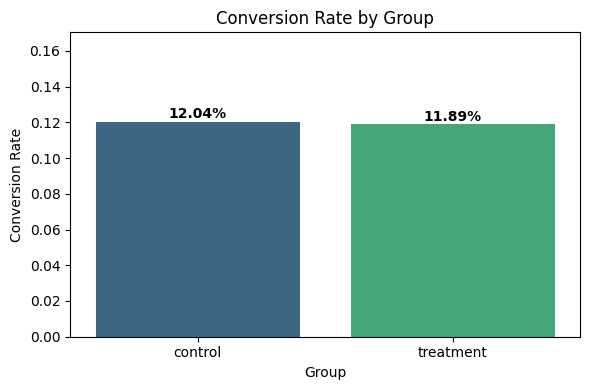

In [9]:
# Calculate conversion rate
conversion_rates = merged_df.groupby('con_treat')['converted'].mean().reset_index()

# Plotting conversion rate by group
plt.figure(figsize=(6, 4))
sns.barplot(data=conversion_rates, x='con_treat', y='converted', hue='con_treat', palette='viridis', legend=False)

# Annotate bars
for i, row in conversion_rates.iterrows():
    plt.text(i, row['converted'] + 0.002, f"{row['converted']:.2%}", ha='center', fontweight='bold')

plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, conversion_rates['converted'].max() + 0.05)
plt.tight_layout()
plt.show()


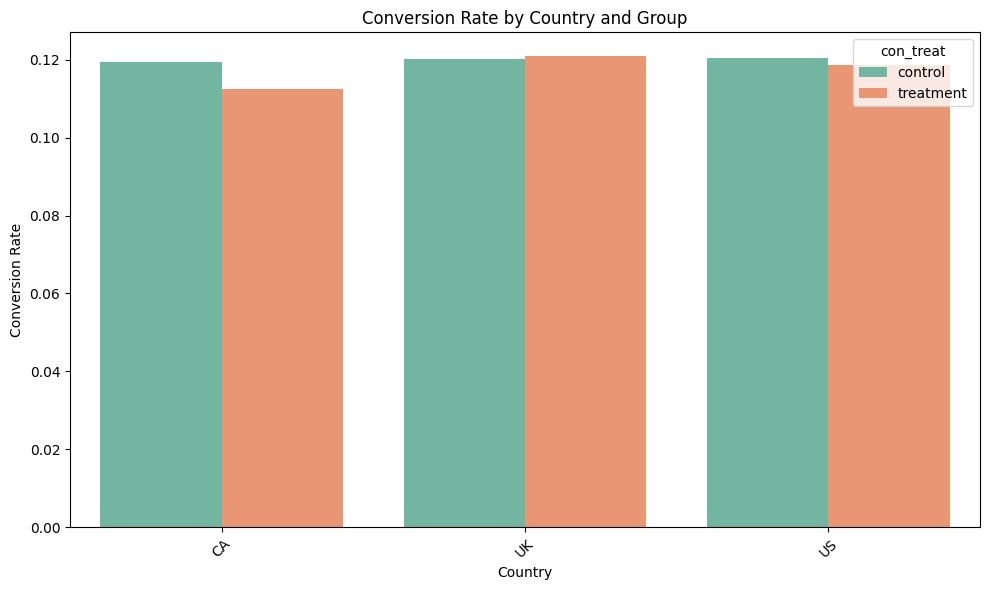

In [10]:
# Calculate conversion rate per group and country
conv_by_country_group = merged_df.groupby(['country', 'con_treat'])['converted'].mean().reset_index()

# Plot conversion rate by country and group
plt.figure(figsize=(10, 6))
sns.barplot(data=conv_by_country_group, x='country', y='converted', hue='con_treat', palette='Set2')

plt.title('Conversion Rate by Country and Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Check country balance between groups
pd.crosstab(merged_df['country'], merged_df['con_treat'], normalize='index')


con_treat,control,treatment
country,,
CA,0.496904,0.503096
UK,0.501791,0.498209
US,0.499404,0.500596
